<a href="https://www.kaggle.com/code/dhanushnarayananr/ukraine-russia-2022-analysis?scriptVersionId=94204688" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv


In [2]:
#Reading the data through pandas
df = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [3]:
#cumulative describe
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,62.000000,62.000000,62.000000,62.0000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,43.000000,33.000000
mean,32.500000,111.693548,110.758065,549.0000,1579.322581,257.806452,87.935484,1016.193548,69.000000,72.612903,5.241935,45.290323,22.348837,3.939394
std,18.041619,52.657442,41.671898,226.4301,468.803981,116.694619,37.736303,454.311363,7.579091,65.798589,2.393197,20.201759,5.801821,0.348155
min,2.000000,10.000000,7.000000,80.0000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000
25%,17.250000,62.000000,83.750000,365.0000,1210.250000,136.250000,62.000000,588.750000,60.000000,7.000000,3.000000,33.250000,20.000000,4.000000
50%,32.500000,122.000000,127.000000,584.0000,1679.000000,298.000000,94.000000,1147.000000,73.000000,61.000000,7.000000,53.000000,25.000000,4.000000
75%,47.750000,156.250000,139.250000,730.2500,1940.250000,348.500000,111.000000,1401.250000,76.000000,122.750000,7.000000,61.000000,26.500000,4.000000
max,63.000000,185.000000,155.000000,939.0000,2342.000000,421.000000,149.000000,1666.000000,76.000000,207.000000,8.000000,71.000000,31.000000,4.000000


Total Military Equipments of Russia : Took from https://armedforces.eu/

Aircraft : 5552
helicopter : 1724
tank : 12270

Artillery : 18497
APC : 26831

MRL : 4359
NAVAL SHIP : 664
Special Equip : 1070
Drones: 2000


In [4]:
#checking for null data
df.isna().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

In [5]:
#filling null data by zero
df.fillna(0, inplace=True)
df['special equipment']= df['special equipment'].astype(int)
df['mobile SRBM system']= df['mobile SRBM system'].astype(int)

In [6]:
df.isna().sum()

date                     0
day                      0
aircraft                 0
helicopter               0
tank                     0
APC                      0
field artillery          0
MRL                      0
military auto            0
fuel tank                0
drone                    0
naval ship               0
anti-aircraft warfare    0
special equipment        0
mobile SRBM system       0
dtype: int64

In [7]:
#changing the dataframe from cumulative to daily change
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
for (columnName, columnData)  in df.iteritems():
    if columnName in needed_list:
        i=0
        new_list=[]
        new_list.append(columnData[0])
        while i<len(columnData)-1:
            n=columnData[i+1]- columnData[i]
            new_list.append(n)
            i=i+1
        print(new_list)
        
        # Drop that column
        df.drop(columnName, axis = 1, inplace = True)

        # Put whatever series you want in its place
        df[columnName] = new_list

[10, 17, 0, 2, 0, 1, 0, 3, 6, 5, 2, 2, 1, 0, 8, 1, 16, 3, 4, 3, 2, 7, 2, 1, 1, 2, 2, 7, 7, 2, 4, 2, 4, 4, 4, 8, 0, 0, 4, 3, 0, 0, 0, 1, 1, 2, 3, 1, 2, 3, 0, 2, 2, 2, 2, 1, 4, 1, 2, 2, 3, 1]
[7, 19, 0, 3, 0, 2, 0, 6, 3, 8, 20, 12, 1, 0, 2, 0, 3, 4, 5, 13, 0, 4, 3, 3, 3, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 1, 2, 1, 0, 0, 0, 1]
[80, 66, 4, 0, 48, 13, 6, 34, 18, 16, 5, 13, 14, 18, 18, 9, 12, 15, 15, 26, 14, 6, 16, 10, 22, 11, 8, 13, 31, 14, 7, 4, 11, 8, 9, 11, 6, 13, 3, 29, 8, 14, 2, 5, 17, 3, 7, 7, 14, 3, 6, 11, 17, 12, 13, 14, 9, 16, 19, 11, 34, 21]
[516, 190, 0, 110, 30, 16, 38, 39, 6, 40, 14, 37, 34, 35, 60, 40, 21, 23, 30, 96, 60, 13, 22, 17, 48, 21, 22, 19, 28, 15, 24, 30, 16, 13, 12, 16, 25, 54, 14, 14, 3, 30, 0, 4, 16, 12, 23, 18, 4, 8, 6, 20, 39, 22, 24, 31, 44, 43, 33, 20, 50, 34]
[49, 0, 1, 24, 3, 8, 5, 15, 0, 4, 8, 3, 0, 3, 2, 10, 5, 10, 0, 40, 11, 4, 8, 17, 10, 12, 15, 13, 11, 2, 1, 8, 1, 2, 6, 5, 1, 8, 5, 2, 0, 0, 1, 2, 7,

In [8]:
#daily change head
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,0
1,2022-02-26,3,17,19,66,190,0,0,30,0,2,0,0,0,0
2,2022-02-27,4,0,0,4,0,1,0,0,0,0,0,0,0,0
3,2022-02-28,5,2,3,0,110,24,17,161,0,1,0,5,0,0
4,2022-03-01,6,0,0,48,30,3,3,14,0,0,0,2,0,0


<AxesSubplot:>

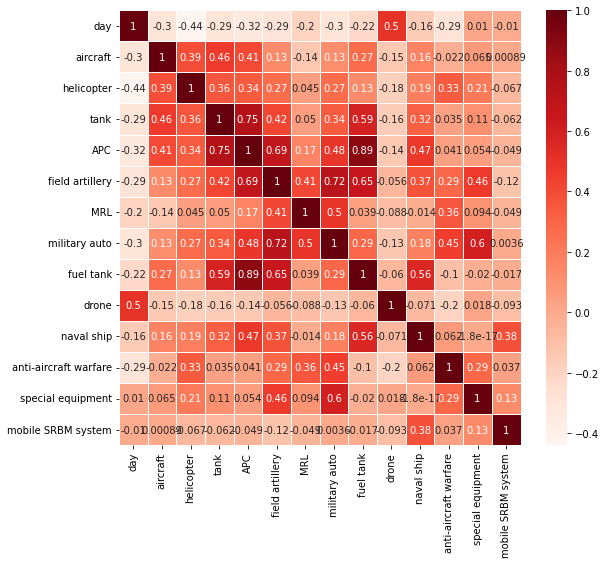

In [9]:
#correlation matrix for daily change
import matplotlib.pyplot as plt
import seaborn as sns

correlation_mat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'Reds',linewidths=0.5)

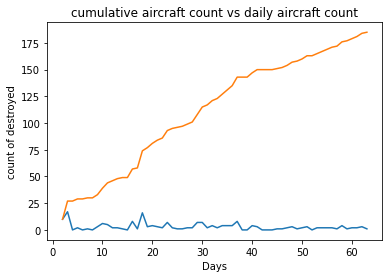

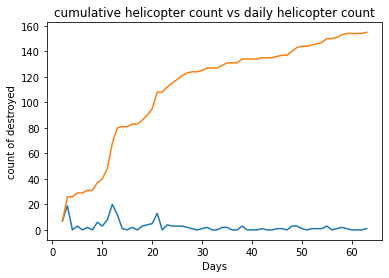

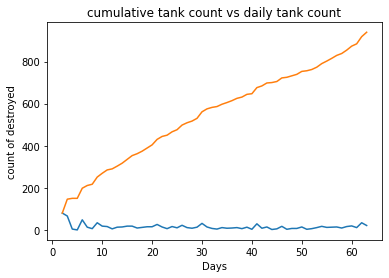

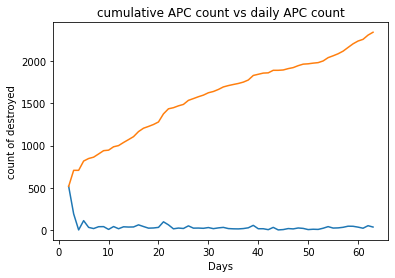

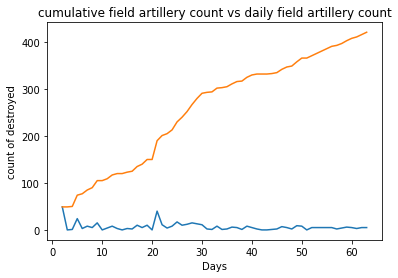

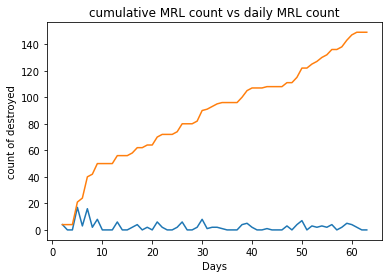

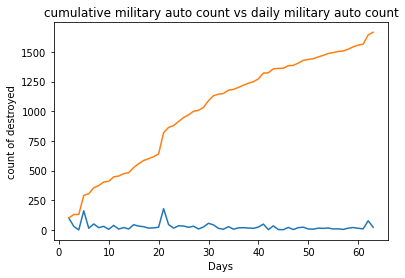

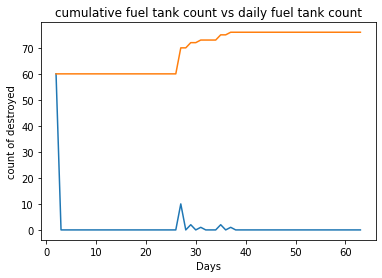

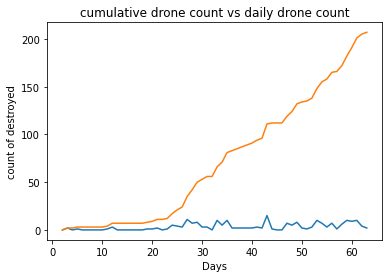

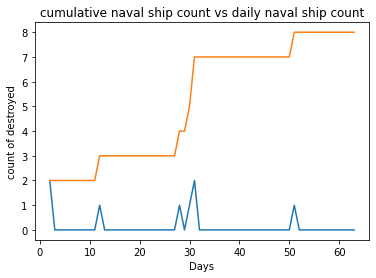

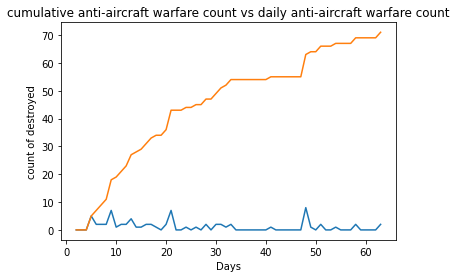

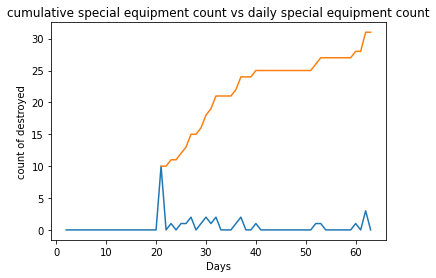

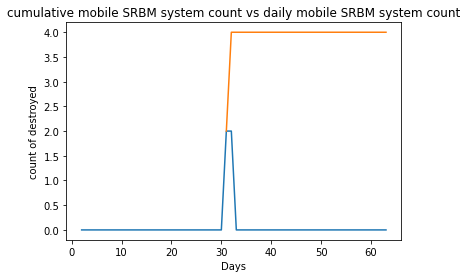

In [10]:
#Normal Plotting for day vs equipment under daily change
#needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
#for (columnName_1, columnData_1)  in df.iteritems():
 #   for (columnName_2, columnData_2)  in df.iteritems():
  #      if columnName_1=="day" and columnName_2 in needed_list:
   #         plt.stem(columnData_1,columnData_2)
    #        plt.xlabel(columnName_1)
     #       plt.ylabel(columnName_2)
      #      plt.show()
from matplotlib.pyplot import plot
df1 = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
#Merged Plotting for both cumulative and daily change
for (columnName_1, columnData_1)  in df.iteritems():
    for (columnName_2, columnData_2)  in df.iteritems():
        if columnName_1=="day" and columnName_2 in needed_list:
            data=[df[columnName_1],df[columnName_2],df1[columnName_2]]
            headers=["day","daily_aircraft_count","cumulative aircraft count"]
            plot(pd.concat(data,axis=1,keys=headers).set_index('day'))
            plt.xlabel("Days")
            plt.ylabel("count of destroyed")
            plt.title("cumulative "+columnName_2+" count vs daily "+columnName_2+" count")
            plt.show()
            
#All Feature PairGrid Plot - Seaborn
#import seaborn as sns
#g = sns.PairGrid(df)
#g.map(sns.scatterplot)

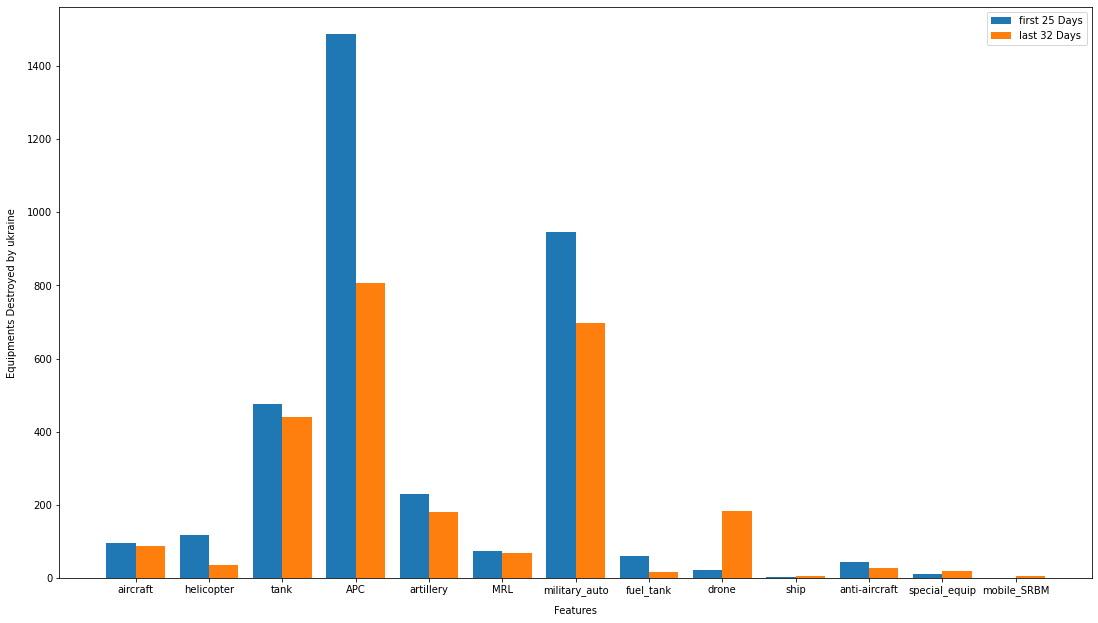

In [11]:
#First 25 days vs last remaining days  -  a bar to explore insights

#plt.barh(df.day[24],df.aircraft[:24].cumsum())
#plt.show()

bar1_main=[]
bar2_main=[]
for (columnName, columnData)  in df.iteritems():
    X_axis = np.arange(len(needed_list))
    if columnName in needed_list:
        bar1=columnData[:24].sum()
        bar2=columnData[25:].sum()
        bar1_main.append(bar1)
        bar2_main.append(bar2)
        
plt.bar(X_axis - 0.2, bar1_main , 0.4, label = 'first 25 Days')
plt.bar(X_axis + 0.2, bar2_main , 0.4, label = 'last 32 Days')
plot_name=["aircraft","helicopter","tank","APC","artillery","MRL","military_auto","fuel_tank","drone","ship","anti-aircraft","special_equip","mobile_SRBM"]
plt.xticks(X_axis, plot_name)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.xlabel("Features",labelpad=10)
plt.ylabel("Equipments Destroyed by ukraine",labelpad=10)
plt.show()